In [1]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


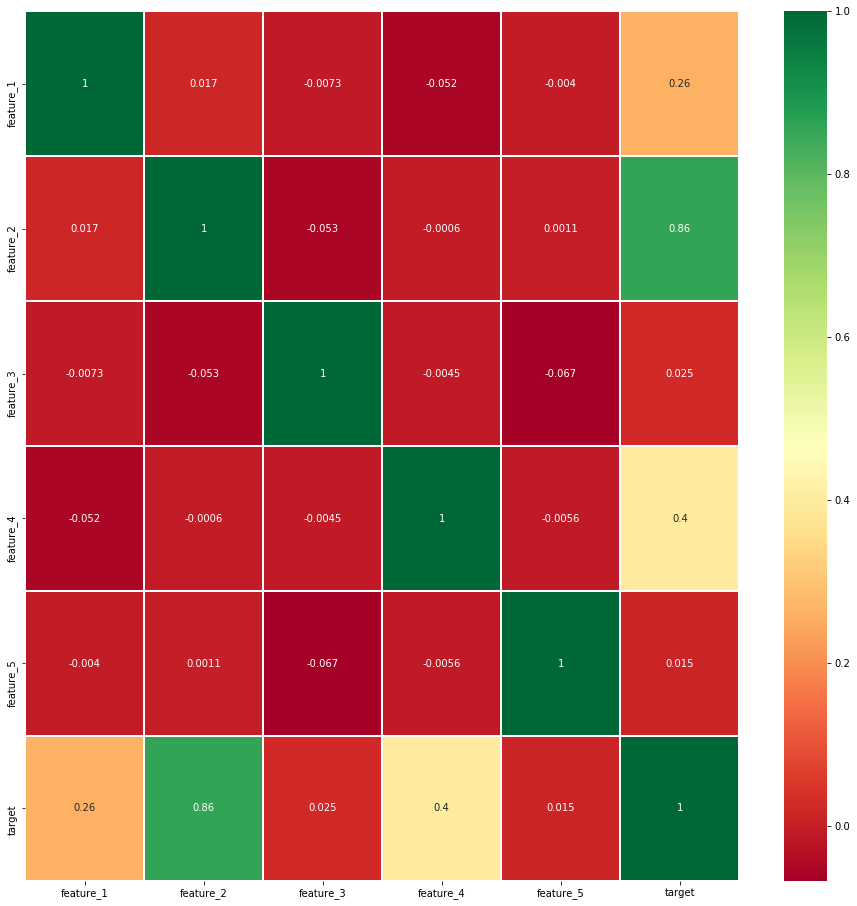

In [4]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn",linewidth=1)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig('Correlation_Matrix_t.png')

In [5]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [6]:
def traintestsplit(df,splitsize):
    
    X = df.iloc[:, 0:-1].values
    y = df['target'].values

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = splitsize, random_state=42)
    return X_train, X_test, y_train, y_test

In [7]:
def multi_poly_reg(deg,df,splitsize):
    print('-'*60)
    print(' Multi Polynomial Regression of degree',deg,'=>')
    X_train, X_test, y_train, y_test = traintestsplit(df,splitsize)
    polynomial_features= PolynomialFeatures(degree = deg)
    X_train_transform = polynomial_features.fit_transform(X_train)
    X_test_transform = polynomial_features.fit_transform(X_test)
    reg = LinearRegression()# Create the regressor: reg
    reg.fit(X_train_transform,y_train)
    y_pred_on_test = reg.predict(X_test_transform)
    y_pred_on_train = reg.predict(X_train_transform)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_on_test))
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_on_train))
    print("Root Mean Squared Error on testing data: {}".format(rmse_test))
    print("Root Mean Squared Error on training data: {}".format(rmse_train))
    print()
    return  [rmse_test,rmse_train,reg]


In [8]:
train_error=[]
test_error=[]
for i in range(1,5):
    a,b,c=multi_poly_reg(i,df,0.3)
    train_error.append(b)
    test_error.append(a)

------------------------------------------------------------
 Multi Polynomial Regression of degree 1 =>
Root Mean Squared Error on testing data: 20.736810400224467
Root Mean Squared Error on training data: 20.262427114255694

------------------------------------------------------------
 Multi Polynomial Regression of degree 2 =>
Root Mean Squared Error on testing data: 20.94271819393086
Root Mean Squared Error on training data: 20.092977902943826

------------------------------------------------------------
 Multi Polynomial Regression of degree 3 =>
Root Mean Squared Error on testing data: 21.45542216301004
Root Mean Squared Error on training data: 19.638328405214725

------------------------------------------------------------
 Multi Polynomial Regression of degree 4 =>
Root Mean Squared Error on testing data: 24.023060148660388
Root Mean Squared Error on training data: 18.85547256761029



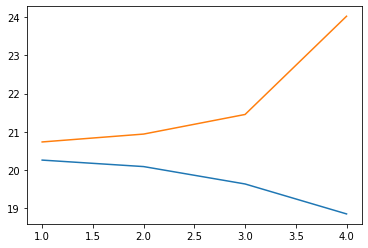

In [9]:
plt.plot(range(1,5),train_error)
plt.plot(range(1,5),test_error)

In [10]:
dft=pd.read_csv('test.csv')

In [11]:
dft.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
df_norm=pd.DataFrame(scaler.fit_transform(df.iloc[:, 0:-1]),columns=df.columns[0:-1])

In [15]:
df_norm['target']=df['target']

In [16]:
df_norm.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.550976,0.350805,0.428935,0.586471,0.547077,-82.154667
1,0.381568,0.462798,0.373152,0.352227,0.558794,-48.897960
2,0.542428,0.510485,0.471857,0.633465,0.431579,77.270371
3,0.533262,0.512018,0.403814,0.501647,0.252619,-2.988581
4,0.253042,0.571173,0.055640,0.411100,0.663448,-37.596722


In [21]:
regressor=multi_poly_reg(1,df_norm,0.3)[2]

------------------------------------------------------------
 Multi Polynomial Regression of degree 1 =>
Root Mean Squared Error on testing data: 20.736810400224456
Root Mean Squared Error on training data: 20.262427114255694



In [22]:
data_test_norm=scaler.fit_transform(dft.values)

In [26]:
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
polynomial_features= PolynomialFeatures(degree = 1)
data_test_norm_transform = polynomial_features.fit_transform(data_test_norm)

In [34]:
data_test_norm_transform[2]

array([1.        , 0.26507041, 0.70835152, 0.41567792, 0.20693057,
       0.54972813])

In [35]:
predictions=regressor.predict(data_test_norm_transform)

In [36]:
sub=pd.DataFrame()

In [37]:
sub['id']=np.arange(0,400)

In [38]:
sub['target']=predictions

In [40]:
sub.to_csv('submission_by_norm.csv',index=False)